### Implementation of Decision Tree

#### Author Name : Tejas P B 
#### Email : mailto:tejas.pb@msea.christuniversity.in 

### Introduction

This notebook involves implementing Sklearn's Decision Tree Classifier with hyperparameter tuning by making use of relevant visualisations. Relevant Evaluation Metrics are used and illustrated through the execution.

### Objectives

1. To understand the implementation of Decision Tree
2. To perform Exploratory Data Analysis 
3. To compare and tune decison tree models using different parameters.

### Problem Statement

Perform classification using Decision Tree on the iris dataset and perform eda for better understanding 

### Method

1. Using in-built Sklearn library methods to perform decison tree classification, and creating dummy classifiers.
2. Using pandas dataframe to store the results and combinations.
3. Comparing the accuracy scores with regards to the model's changing parameters.

### About the dataset 

The Iris dataset is a classic machine learning dataset containing 150 samples of iris flowers, each belonging to one of three species: setosa, versicolor, or virginica. It comprises four features—sepal length, sepal width, petal length, and petal width—measured in centimeters. This dataset is commonly used for classification and pattern recognition tasks.

### References 
### Sklearn
1. https://scikit-learn.org/stable/modules/tree.html
2. https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Importing required libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [10]:
from sklearn.datasets import load_iris

## Importing the dataset

In [11]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
import seaborn as sns

In [13]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Exploratory Data Analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Boxplot for each feature by species

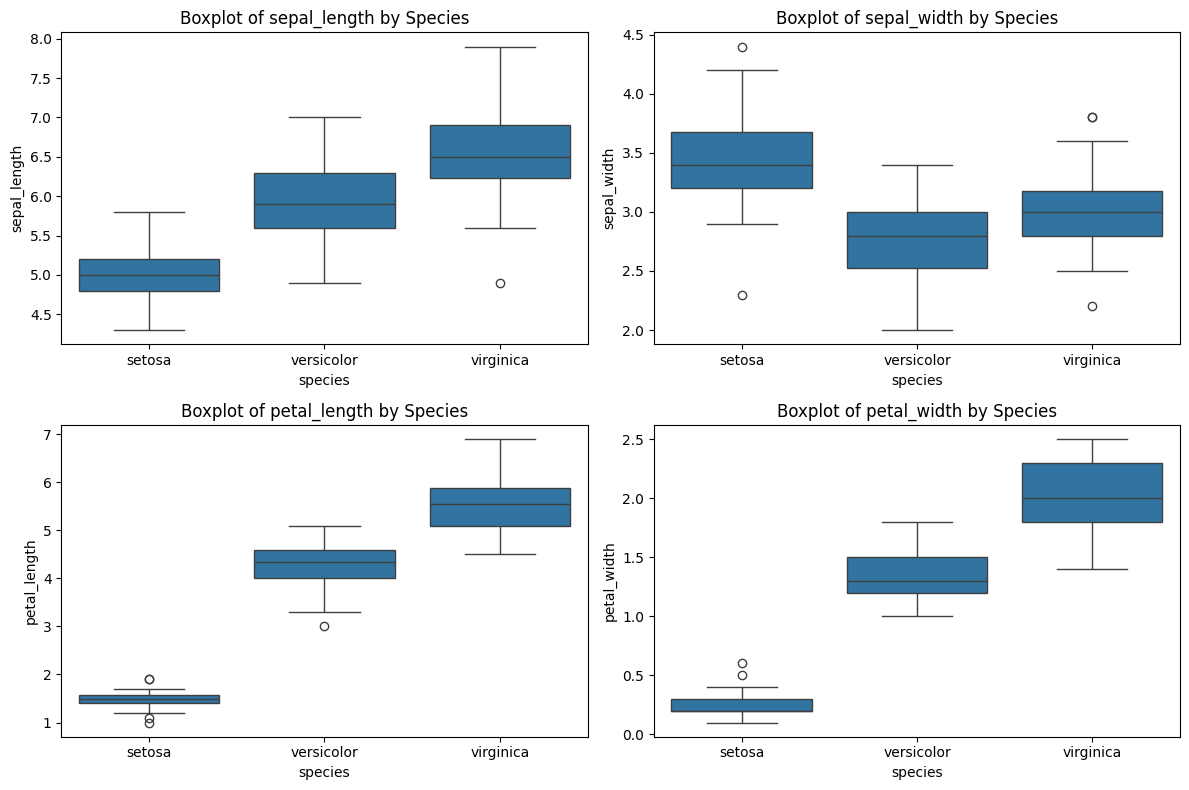

In [20]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

#### Violin plot for each feature by species

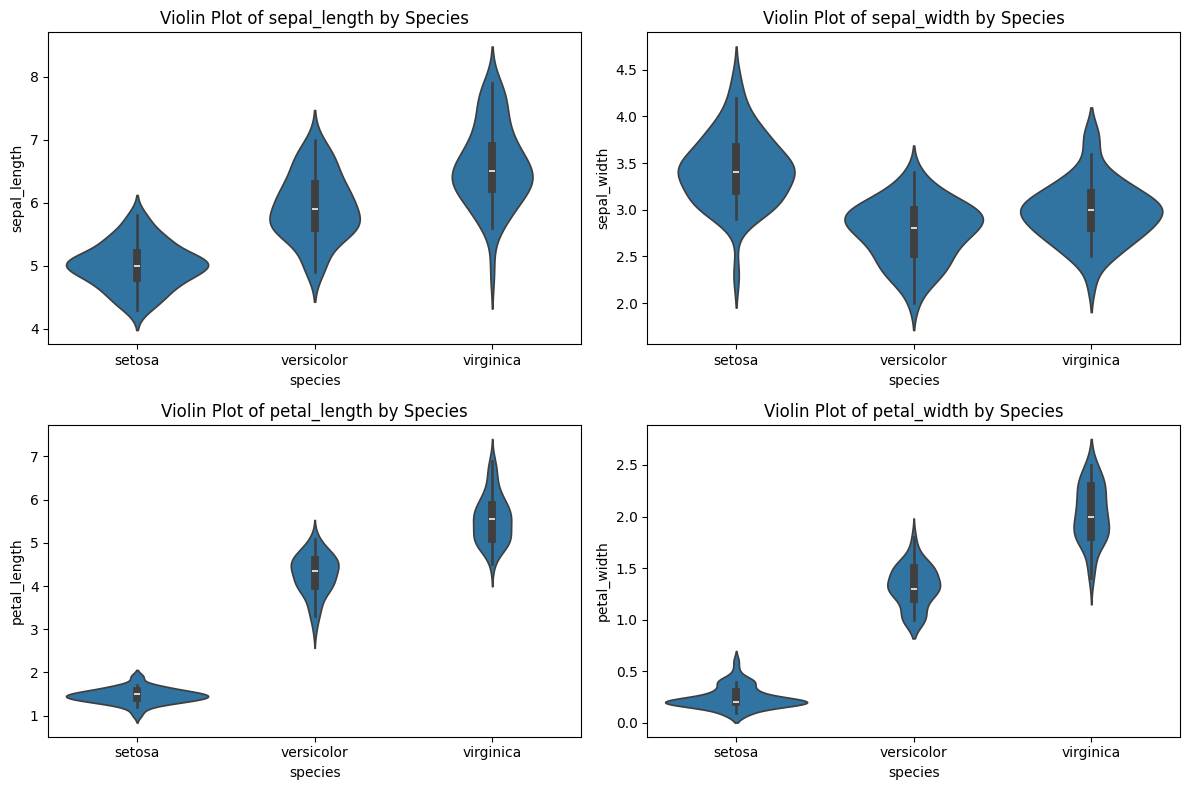

In [21]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Species')

plt.tight_layout()
plt.show()

#### Pairplot for specified columns

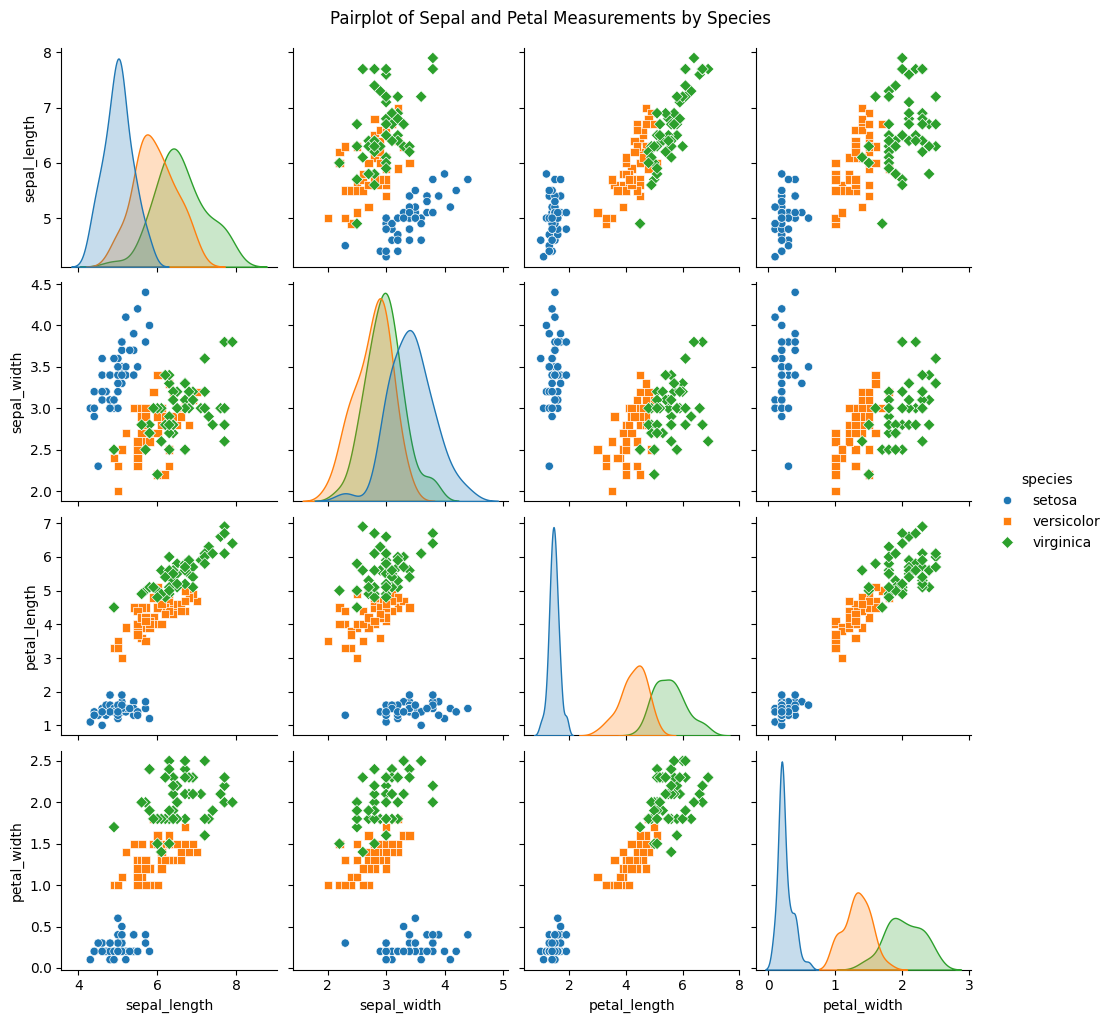

In [22]:
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue='species', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Sepal and Petal Measurements by Species", y=1.02)
plt.show()

#### Correlation among the features of the dataset

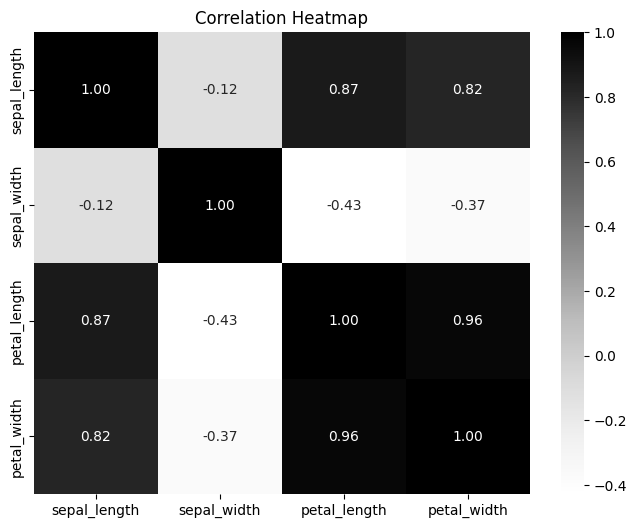

In [23]:
correlation_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Countplot for target variable

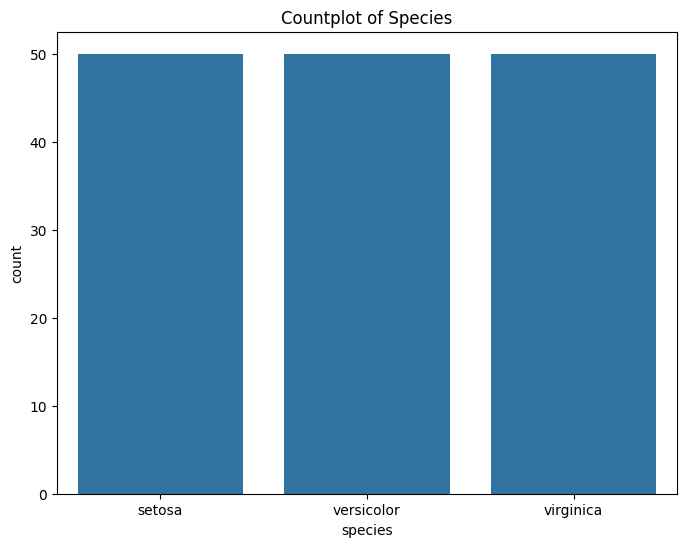

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title("Countplot of Species")
plt.show()

#### Swarm plot for each feature by species

C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 20.0% of the points 

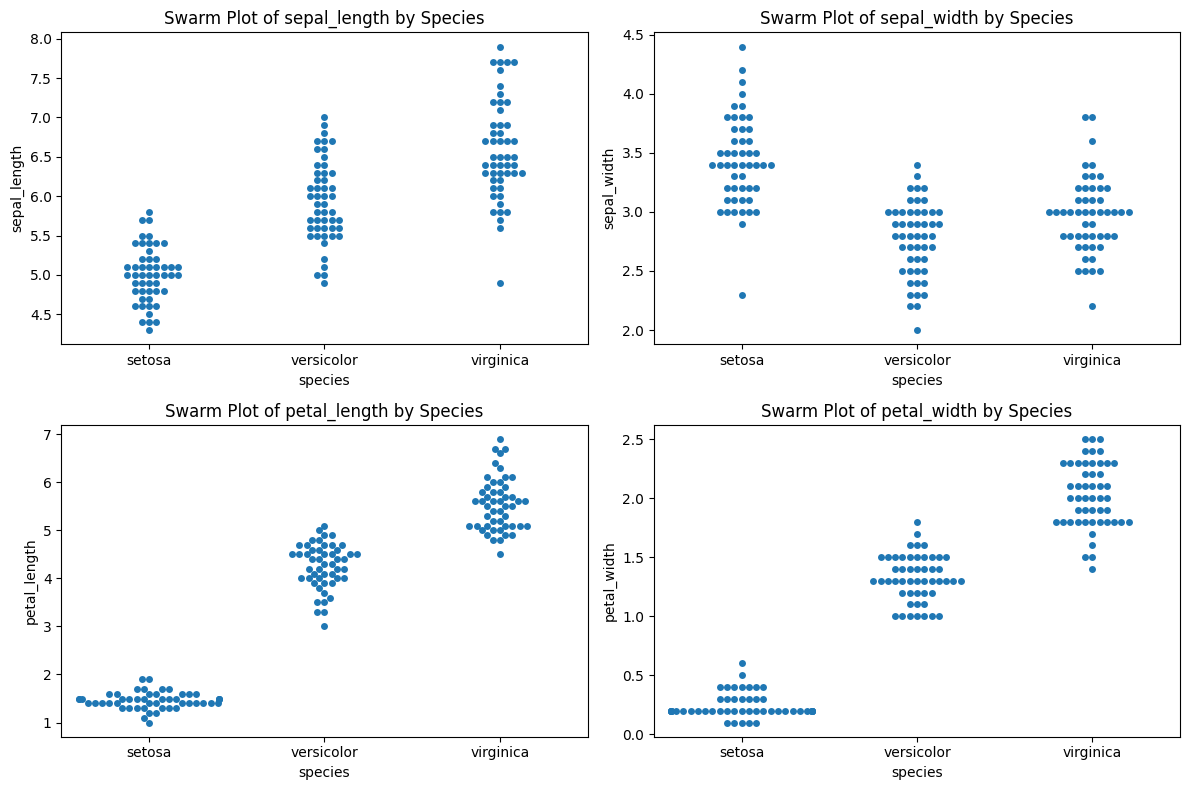

In [25]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='species', y=feature, data=df)
    plt.title(f'Swarm Plot of {feature} by Species')

plt.tight_layout()
plt.show()

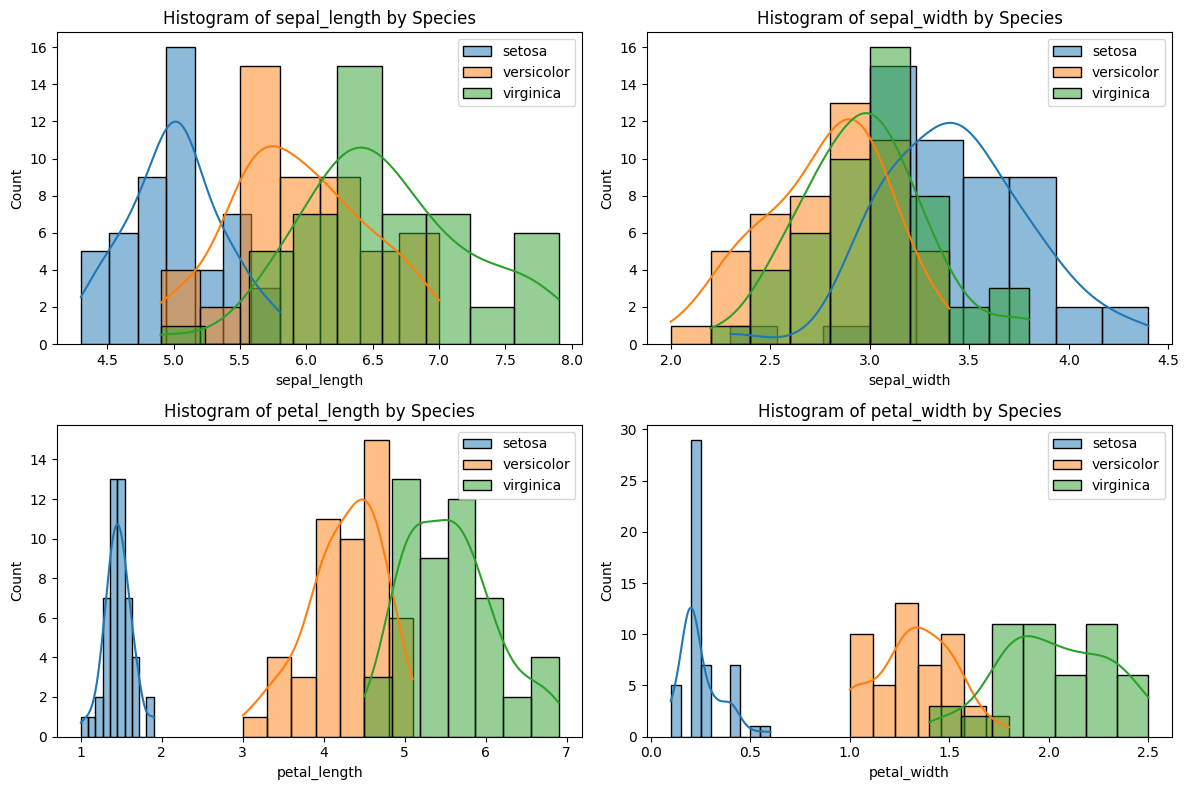

In [26]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i + 1)
    for species in df['species'].unique():
        sns.histplot(df[df['species'] == species][feature], kde=True, label=species, alpha=0.5)
    plt.title(f'Histogram of {feature} by Species')
    plt.legend()

plt.tight_layout()
plt.show()

#### Independent feature and dependent features

In [27]:
X=df.iloc[:,:-1]
y=iris.target

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=2)

In [32]:
treemodel.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

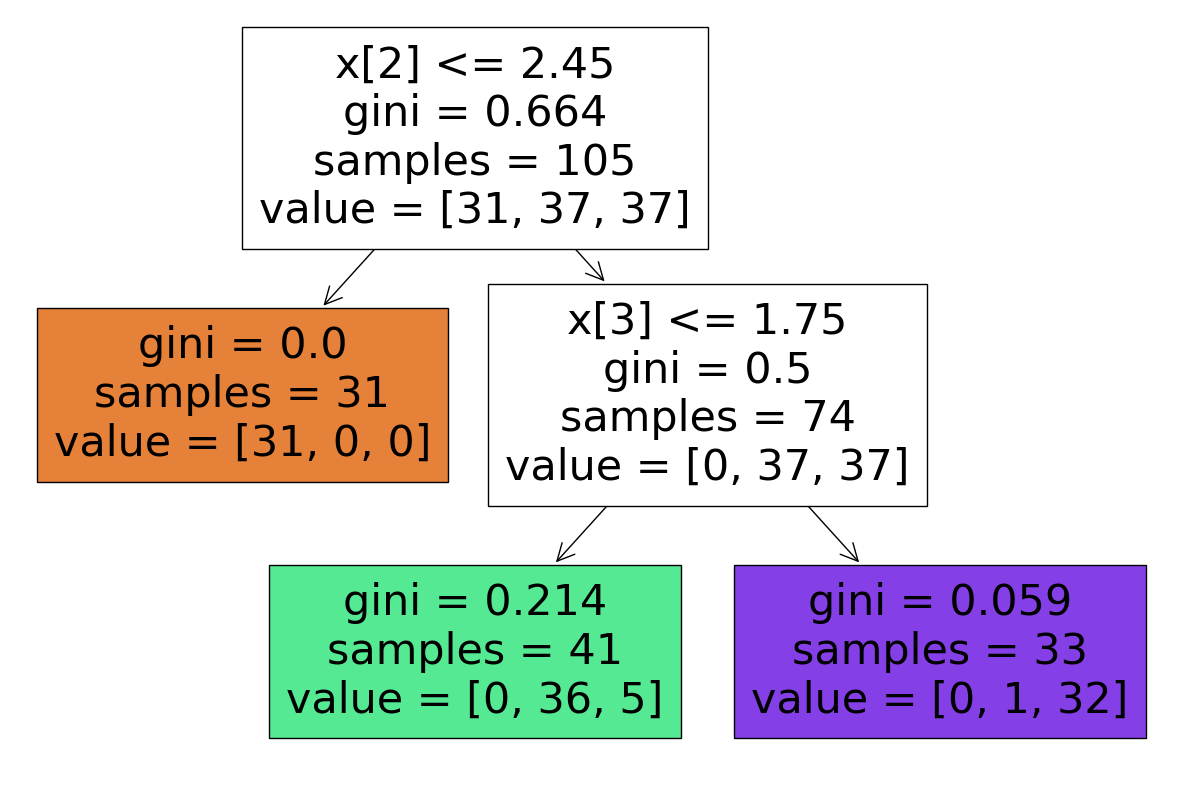

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [34]:
#prediction
y_pred=treemodel.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,classification_report

In [36]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [37]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Inference
The classification model exhibits perfect performance with an accuracy of 100%. Each class (0, 1, 2) demonstrates impeccable precision, recall, and F1-score. The overall evaluation metrics, macro and weighted averages, also indicate flawless performance across all classes in the dataset.